In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# List of CSV file names
file_names = ['dataset.csv', 'dataset1.csv', 'dataset2.csv', 'dataset3.csv', 'dataset4.csv', 'dataset5.csv', 'dataset6.csv', 'dataset7.csv', 'dataset8.csv', 'dataset9.csv', 'dataset10.csv', 'dataset11.csv']

# Initialize an empty list to store DataFrames
dfs = []


for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame (stacking rows)
merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)


In [ ]:
data = pd.read_csv('merged_file.csv')
data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])

data = data.sort_values(by='Time Stamp', ascending=True)
data

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage[V],Current[A],Temperature[C],Capacity[Ah],WhAccu,Cnt,Unnamed: 14
0,2018-10-28 11:04:09,3,PAU,00:01:05.017,00:01:00.000,0,0,NN_Char_Charge,4.18563,0.0,23.76583,0.0000,0.00000,1.0,NaN
1,2018-10-28 11:05:09,3,PAU,00:02:05.017,00:02:00.000,0,0,NN_Char_Charge,4.18563,0.0,23.97615,0.0000,0.00000,1.0,NaN
2,2018-10-28 11:06:09,3,PAU,00:03:05.018,00:03:00.001,0,0,NN_Char_Charge,4.18546,0.0,23.97615,0.0000,0.00000,1.0,NaN
3,2018-10-28 11:07:09,3,PAU,00:04:05.017,00:04:00.000,0,0,NN_Char_Charge,4.18546,0.0,23.97615,0.0000,0.00000,1.0,NaN
4,2018-10-28 11:08:09,3,PAU,00:05:05.016,00:04:59.999,0,0,NN_Char_Charge,4.18546,0.0,23.76583,0.0000,0.00000,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,2018-10-30 22:59:44,9,PAU,21:05:03.907,00:57:00.003,0,0,NN_Char_Charge,4.18596,0.0,23.97615,2.5816,10.11657,5.0,NaN
2150,2018-10-30 23:00:44,9,PAU,21:06:03.905,00:58:00.001,0,0,NN_Char_Charge,4.18596,0.0,24.18646,2.5816,10.11657,5.0,NaN
2151,2018-10-30 23:01:44,9,PAU,21:07:03.906,00:59:00.002,0,0,NN_Char_Charge,4.18596,0.0,23.97615,2.5816,10.11657,5.0,NaN
2152,2018-10-30 23:02:44,9,PAU,21:08:03.904,01:00:00.000,0,0,NN_Char_Charge,4.18579,0.0,23.45035,2.5816,10.11657,5.0,NaN


<Axes: >

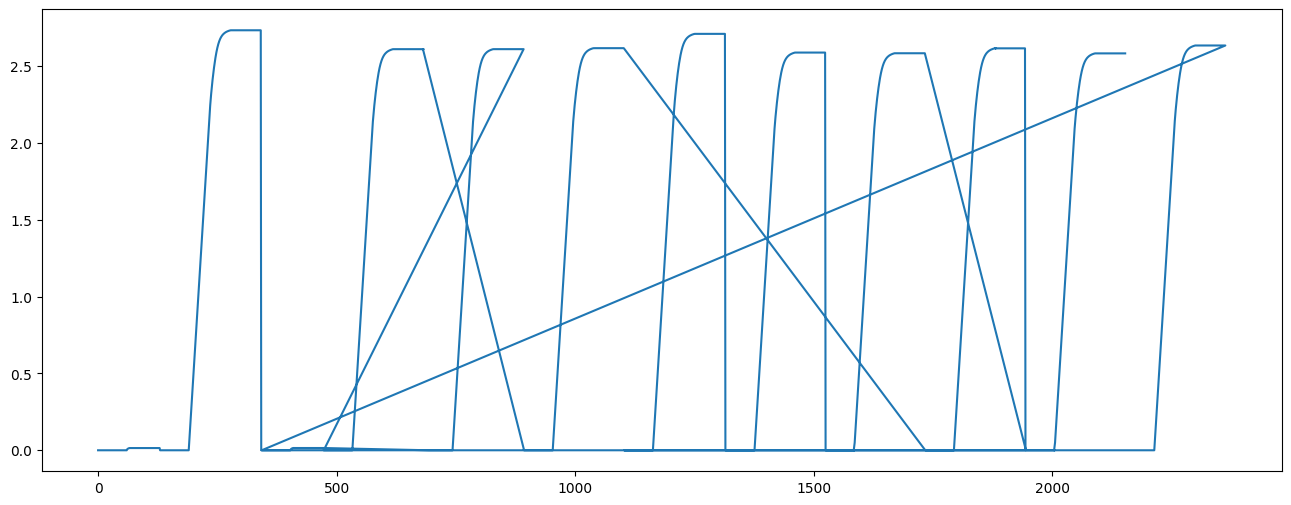

In [ ]:
data['Capacity[Ah]'].plot(figsize=(16,6))

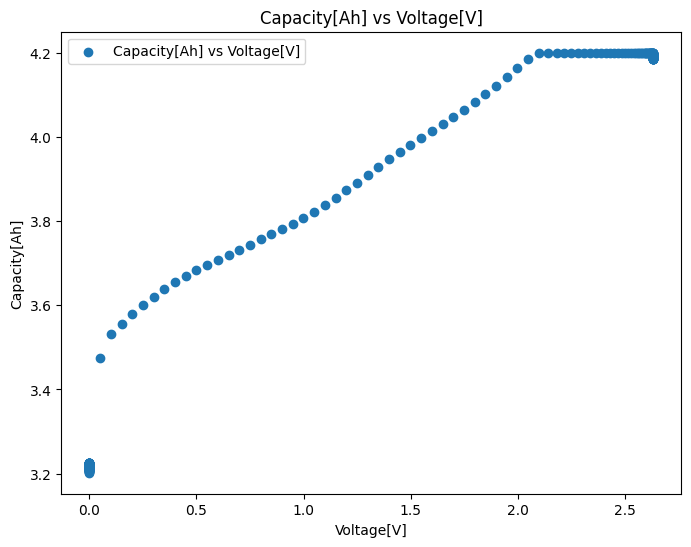

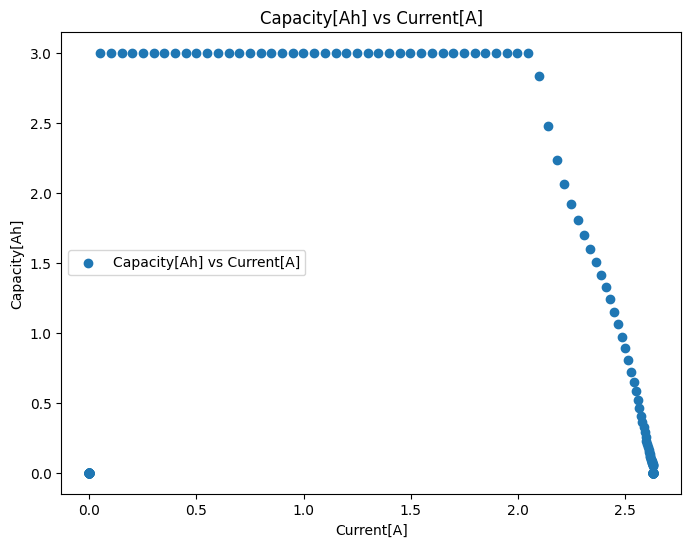

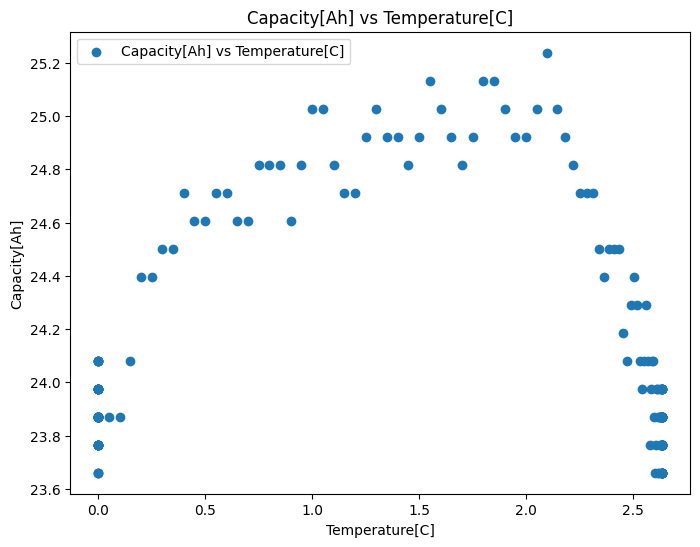

In [ ]:
# Specify the columnn plotting against
y_column = "Capacity[Ah]"

# List of columns to plot against the x_column
x_columns = ["Voltage[V]", "Current[A]","Temperature[C]"]

# Create subplots for each pair (x_column, y_column)
for x_column in x_columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each subplot
    plt.scatter(df[y_column], df[x_column], label=f"{y_column} vs {x_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.title(f"{y_column} vs {x_column}")

plt.show()


In [ ]:
data_1655th_row = data.iloc[1654]
data_1655th_row

Time Stamp        2018-10-30 05:09:35
Step                                4
Status                            CHA
Prog Time                03:14:55.888
Step Time                01:09:59.999
Cycle                               0
Cycle Level                         0
Procedure              NN_Char_Charge
Voltage[V]                    4.19979
Current[A]                    0.24009
Temperature[C]               23.87099
Capacity[Ah]                  2.67609
WhAccu                       10.42499
Cnt                               1.0
Unnamed: 14                       NaN
Name: 1233, dtype: object

In [ ]:
# training data
data_training = data[data['Time Stamp'] < '2018-10-30 05:09:35'].copy()
data_training

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage[V],Current[A],Temperature[C],Capacity[Ah],WhAccu,Cnt,Unnamed: 14
0,2018-10-28 11:04:09,3,PAU,00:01:05.017,00:01:00.000,0,0,NN_Char_Charge,4.18563,0.00000,23.76583,0.00000,0.00000,1.0,NaN
1,2018-10-28 11:05:09,3,PAU,00:02:05.017,00:02:00.000,0,0,NN_Char_Charge,4.18563,0.00000,23.97615,0.00000,0.00000,1.0,NaN
2,2018-10-28 11:06:09,3,PAU,00:03:05.018,00:03:00.001,0,0,NN_Char_Charge,4.18546,0.00000,23.97615,0.00000,0.00000,1.0,NaN
3,2018-10-28 11:07:09,3,PAU,00:04:05.017,00:04:00.000,0,0,NN_Char_Charge,4.18546,0.00000,23.97615,0.00000,0.00000,1.0,NaN
4,2018-10-28 11:08:09,3,PAU,00:05:05.016,00:04:59.999,0,0,NN_Char_Charge,4.18546,0.00000,23.76583,0.00000,0.00000,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,2018-10-30 05:04:35,4,CHA,03:09:55.891,01:05:00.002,0,0,NN_Char_Charge,4.19979,0.43675,24.08130,2.64875,10.31016,1.0,NaN
1229,2018-10-30 05:05:35,4,CHA,03:10:55.889,01:06:00.000,0,0,NN_Char_Charge,4.19979,0.38567,23.97615,2.65559,10.33888,1.0,NaN
1230,2018-10-30 05:06:35,4,CHA,03:11:55.892,01:07:00.003,0,0,NN_Char_Charge,4.19979,0.34225,23.97615,2.66166,10.36438,1.0,NaN
1231,2018-10-30 05:07:35,4,CHA,03:12:55.890,01:08:00.001,0,0,NN_Char_Charge,4.19979,0.30649,23.87099,2.66705,10.38700,1.0,NaN


In [ ]:
# testing data
data_test = data[data['Time Stamp'] > '2018-10-30 05:09:35'].copy()
data_test

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage[V],Current[A],Temperature[C],Capacity[Ah],WhAccu,Cnt,Unnamed: 14
1234,2018-10-30 05:10:35,4,CHA,03:15:55.889,01:11:00.000,0,0,NN_Char_Charge,4.19979,0.21455,23.87099,2.67988,10.44091,1.0,NaN
1235,2018-10-30 05:11:35,4,CHA,03:16:55.890,01:12:00.001,0,0,NN_Char_Charge,4.19979,0.19156,23.87099,2.68327,10.45512,1.0,NaN
1236,2018-10-30 05:12:35,4,CHA,03:17:55.891,01:13:00.002,0,0,NN_Char_Charge,4.19979,0.17113,23.87099,2.68629,10.46782,1.0,NaN
1237,2018-10-30 05:13:35,4,CHA,03:18:55.888,01:13:59.999,0,0,NN_Char_Charge,4.19979,0.15325,23.87099,2.68902,10.47927,1.0,NaN
1238,2018-10-30 05:14:35,4,CHA,03:19:55.889,01:15:00.000,0,0,NN_Char_Charge,4.19979,0.13792,23.87099,2.69148,10.48959,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,2018-10-30 22:59:44,9,PAU,21:05:03.907,00:57:00.003,0,0,NN_Char_Charge,4.18596,0.00000,23.97615,2.58160,10.11657,5.0,NaN
2150,2018-10-30 23:00:44,9,PAU,21:06:03.905,00:58:00.001,0,0,NN_Char_Charge,4.18596,0.00000,24.18646,2.58160,10.11657,5.0,NaN
2151,2018-10-30 23:01:44,9,PAU,21:07:03.906,00:59:00.002,0,0,NN_Char_Charge,4.18596,0.00000,23.97615,2.58160,10.11657,5.0,NaN
2152,2018-10-30 23:02:44,9,PAU,21:08:03.904,01:00:00.000,0,0,NN_Char_Charge,4.18579,0.00000,23.45035,2.58160,10.11657,5.0,NaN


In [ ]:
training_data = data_training[['Voltage[V]','Current[A]','Temperature[C]','Capacity[Ah]']]
training_data.head()

,Voltage[V],Current[A],Temperature[C],Capacity[Ah]
0,4.18563,0.0,23.76583,0.0
1,4.18563,0.0,23.97615,0.0
2,4.18546,0.0,23.97615,0.0
3,4.18546,0.0,23.97615,0.0
4,4.18546,0.0,23.76583,0.0


In [ ]:
# feature scaling
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.98728253, 0.        , 0.22222457, 0.        ],
       [0.98728253, 0.        , 0.33333686, 0.        ],
       [0.98713155, 0.        , 0.33333686, 0.        ],
       ...,
       [0.99985791, 0.11404228, 0.33333686, 0.97428896],
       [0.99985791, 0.10212657, 0.27778071, 0.97626194],
       [0.99985791, 0.09021419, 0.27778071, 0.97801164]])

In [ ]:
X_train = []
Y_train = []

In [ ]:
training_data.shape[0]

1654

In [ ]:
#creating a data structure with 5 timestamps and 1 output

for i in range(5, training_data.shape[0]):
  X_train.append(training_data[i-5:i])
  Y_train.append(training_data[i,3])

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(1649, 5, 4)

In [ ]:
# building the RNN
# importing keras libraries and packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 4)))
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11000     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11051 (43.17 KB)
Trainable params: 11051 (43.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compiling the model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
#fitting the model to the training set
history = model.fit(X_train, Y_train, epochs = 1000, batch_size=10)

Epoch 1/1000
165/165 [==============================] - 8s 12ms/step - loss: 0.0682
Epoch 2/1000
165/165 [==============================] - 2s 12ms/step - loss: 0.0062
Epoch 3/1000
165/165 [==============================] - 2s 13ms/step - loss: 0.0058
Epoch 4/1000
165/165 [==============================] - 3s 19ms/step - loss: 0.0056
Epoch 5/1000
165/165 [==============================] - 2s 11ms/step - loss: 0.0049
Epoch 6/1000
165/165 [==============================] - 2s 12ms/step - loss: 0.0046
Epoch 7/1000
165/165 [==============================] - 2s 12ms/step - loss: 0.0043
Epoch 8/1000
165/165 [==============================] - 2s 12ms/step - loss: 0.0044
Epoch 9/1000
165/165 [==============================] - 3s 15ms/step - loss: 0.0041
Epoch 10/1000
165/165 [==============================] - 3s 16ms/step - loss: 0.0039
Epoch 11/1000
165/165 [==============================] - 2s 11ms/step - loss: 0.0039
Epoch 12/1000
165/165 [==============================] - 2s 11ms/step - lo

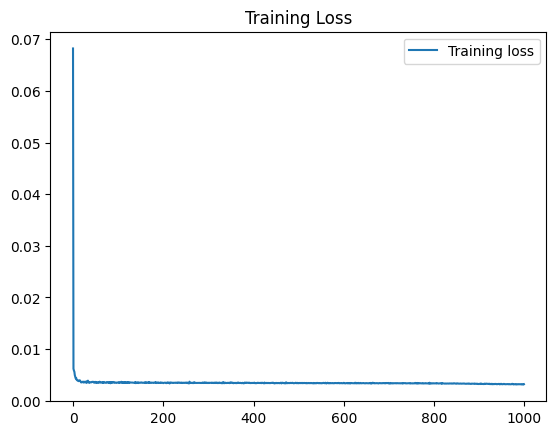

In [ ]:
loss = history.history['loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [ ]:
data_test = data_test[['Voltage[V]','Current[A]','Temperature[C]','Capacity[Ah]']]

In [ ]:
data_test.head()

,Voltage[V],Current[A],Temperature[C],Capacity[Ah]
1234,4.19979,0.21455,23.87099,2.67988
1235,4.19979,0.19156,23.87099,2.68327
1236,4.19979,0.17113,23.87099,2.68629
1237,4.19979,0.15325,23.87099,2.68902
1238,4.19979,0.13792,23.87099,2.69148


In [ ]:
inputs = scaler.transform(data_test)
inputs

array([[0.99985791, 0.07149093, 0.27778071, 0.98095831],
       [0.99985791, 0.06383035, 0.27778071, 0.9821992 ],
       [0.99985791, 0.05702281, 0.27778071, 0.98330466],
       ...,
       [0.9875756 , 0.        , 0.33333686, 0.94498334],
       [0.98742462, 0.        , 0.05555614, 0.94498334],
       [0.98742462, 0.        , 0.05555614, 0.94498334]])

In [ ]:
X_test = []
Y_test = []

for i in range(5, inputs.shape[0]):
  X_test.append(inputs[i-5:i])
  Y_test.append(inputs[i,3])

In [ ]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((704, 5, 4), (704,))

In [ ]:
Y_pred = model.predict(X_test)
Y_pred, Y_test

22/22 [==============================] - 0s 3ms/step


(array([[ 9.79543447e-01],
        [ 9.81859446e-01],
        [ 9.84025002e-01],
        [ 1.00009310e+00],
        [ 9.89665747e-01],
        [ 9.76362944e-01],
        [ 9.67422485e-01],
        [ 1.01155794e+00],
        [ 9.90137577e-01],
        [ 9.85653043e-01],
        [ 9.69989300e-01],
        [ 9.95608091e-01],
        [ 9.59438205e-01],
        [ 9.94866371e-01],
        [ 9.84339714e-01],
        [ 9.91235256e-01],
        [ 9.87766862e-01],
        [ 9.81402636e-01],
        [ 9.56727386e-01],
        [ 9.38519597e-01],
        [ 9.91771460e-01],
        [ 1.00364614e+00],
        [ 9.75045562e-01],
        [ 9.68855143e-01],
        [ 1.00694871e+00],
        [ 9.65677738e-01],
        [ 1.00802672e+00],
        [ 1.00086701e+00],
        [ 9.92568970e-01],
        [ 9.55823183e-01],
        [ 9.66330171e-01],
        [ 9.88973737e-01],
        [ 1.00309873e+00],
        [ 9.65094209e-01],
        [ 9.56202745e-01],
        [ 9.82340097e-01],
        [ 9.86244678e-01],
 

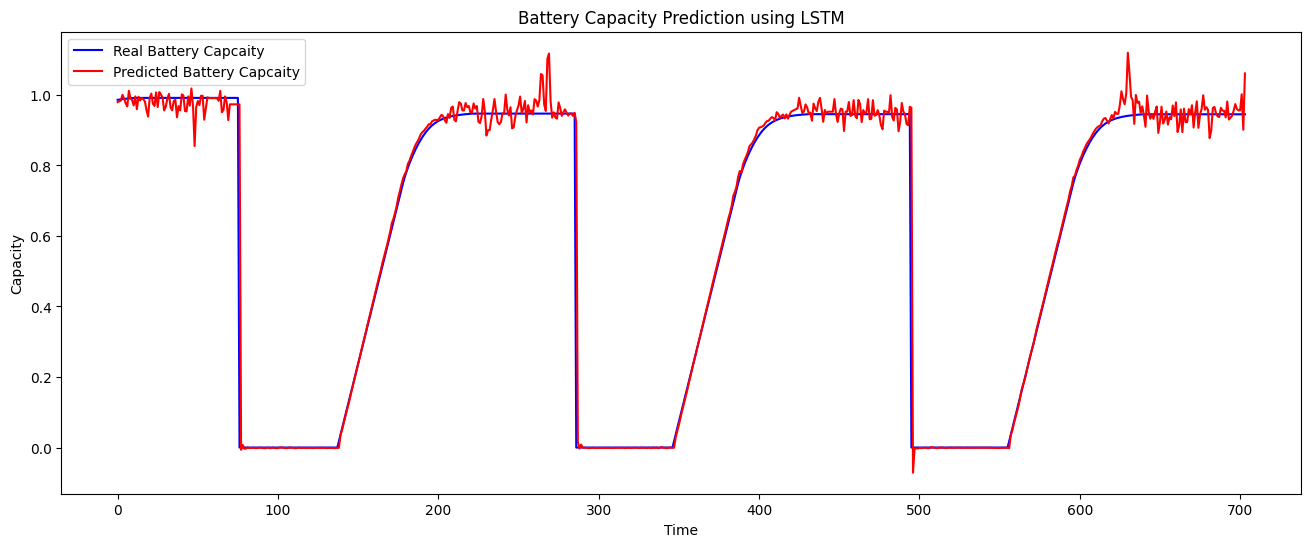

In [ ]:
#visualising the results

plt.figure(figsize=(16,6))
plt.plot(Y_test, color = 'blue', label = 'Real Battery Capcaity')
plt.plot(Y_pred, color = 'red', label = 'Predicted Battery Capcaity')
plt.title('Battery Capacity Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Capacity')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
print(mse)

0.004407077463846322
